# Netflix EDA

## Uthman Dantata

### Data from: https://www.kaggle.com/datasets/shivamb/netflix-shows

## Import Data 

In [32]:
import pandas as pd
import matplotlib
import plotly.express as px

In [3]:
# saving csv into a variable to make it easier to access
data_import = pd.read_csv("netflix_titles.csv")
data_import

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# High Level EDA

## Step 1: Cleaning Data

In [4]:
data_import.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

object means string

date_added is seen by the computer as an object. this is a problem because it should recognize it as a date

In [21]:
data_import["date_added"] = pd.to_datetime(data_import["date_added"].str.strip(), format="%B %d, %Y")

In [23]:
data_import.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Statistical Analysis of integer columns

In [24]:
data_import.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Date Analysis

<AxesSubplot: >

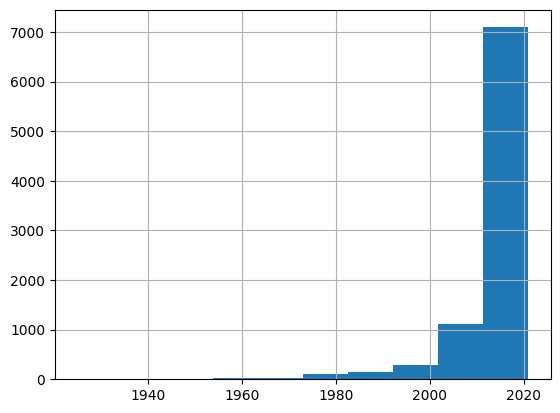

In [31]:
data_import['release_year'].hist() # Matplotlib version

PLOTLY METHOD

In [33]:
px.histogram(data_import, x="release_year")

In [34]:
fig = px.histogram(data_import, x="release_year")
fig.update_layout(bargap=0.2)
fig

In [36]:
px.histogram(data_import, x="date_added").update_layout(bargap=0.2)

QUESTION: What month does Netflix frequently add movies?

In [38]:
month = data_import["date_added"].dt.month
month.describe()

count    8797.000000
mean        6.654996
std         3.436554
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: date_added, dtype: float64

In [39]:
px.histogram(month).update_layout(bargap=0.2)

d